Today we will be using some of our numerical packages in Python to explore a useful technique in machine learning.

In [1]:
# These are going to come in handy as we work with the data.
import numpy as np
import matplotlib.pyplot as plt

Now let's import a data set, the wine data set. 

In [2]:
from sklearn.datasets import load_wine

In [3]:
X, y = load_wine(return_X_y=True)

# X matrix is m examples by n features (m,n)
# y is a 1D array of integer class labels

# ---INSERT CODE BELOW--- find the dimensions of the array X
m, n = X.shape

print('X shape = ', (m,n))
print(str(m) + ' examples, ' + str(n) + ' features/variables')
print('There are ' + str(len(np.unique(y))) + ' classes.')


X shape =  (178, 13)
178 examples, 13 features/variables
There are 3 classes.


Limited exapmles, yet a substantial set of features. Let's see what we can get from a PCA analysis.

(178, 178)
(178, 13)
(13, 13)


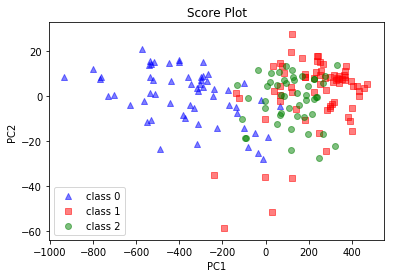

In [4]:
# General practice is to use mean subtraction, subtract the mean of each feature (columns) for each feature in each example.
# ---INSERT CODE BELOW--- Hint: numpy has a great way of doing this using broadcasting
X -= np.mean(X, axis = 0, keepdims=True)

# ---INSERT CODE BELOW--- Perform the singular value decomposition of X, generate the rectangular diagonal S matrix from the 
# returned singular values, and generate the pricipal component scores == U dot S
def generatePCS(X):
    m,n = X.shape
    U, s, Vt = np.linalg.svd(X)
    print(U.shape)
    S = np.concatenate((np.diag(s), np.zeros((m-n, n))), axis = 0)
    print(S.shape)
    print(Vt.shape)
    PCs = np.dot(U, S)
    return (PCs, s)


from utils import PlotPC1PC2 #Loading a helper function to plot and save time
PCs, s = generatePCS(X)
PlotPC1PC2(PCs, y)

This doesn't seem to differentiate the class 1 and 2 very well... It seems these values aren't on comparable scales. Let's try to investigate this.

In [5]:
#---INSERT CODE BELOW--- Using numpy, print two vectors of length n showing the max and min of each of the features
print(np.max(X, axis = 0))
print(np.min(X, axis = 0))

[  1.82938202e+00   3.46365169e+00   8.63483146e-01   1.05050562e+01
   6.22584270e+01   1.58488764e+00   3.05073034e+00   2.98146067e-01
   1.98910112e+00   7.94191012e+00   7.52550562e-01   1.38831461e+00
   9.33106742e+02]
[ -1.97061798e+00  -1.59634831e+00  -1.00651685e+00  -8.89494382e+00
  -2.97415730e+01  -1.31511236e+00  -1.68926966e+00  -2.31853933e-01
  -1.18089888e+00  -3.77808988e+00  -4.77449438e-01  -1.34168539e+00
  -4.68893258e+02]


Because some of the features have very different ranges and scales, let's bring these to a more comparable level using feature scaling.

(178, 178)
(178, 13)
(13, 13)


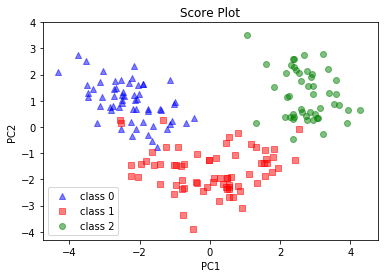

In [6]:
# Again using numpy, find the standard deviation of each feature across all samples (i.e. the standard deviation of each column)
# and divide by this value.
# ---INSERT CODE HERE---
X /= np.std(X, axis = 0, keepdims=True)



PCs, s = generatePCS(X)
PlotPC1PC2(PCs, y)

This seems like a much better result, we are observing some distinct separation in the PCA space with only 2 components.

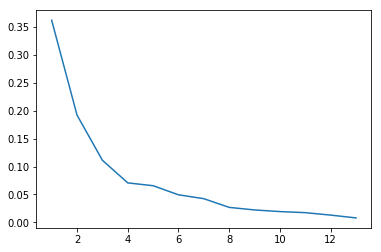

In [7]:
# Now we will plot the percent of variance that each component describes according to the sorted eigenvalues of X'X
# We generate the eigenvalues from the singular values, s. What is the relationship? 
# ---INSERT CODE HERE--- Generate an array of the eigenvalues scaled such that their sum = 1. 
scaled_eigenvalues = s**2/np.sum(s**2)

# Making the scree plot
_ = np.arange(len(s)) + 1
plt.plot(_, scaled_eigenvalues)
plt.show()

In [8]:
def describe_variance(scaled_eigenvalues, thresh):
    #---INSERT CODE HERE--- Finish the function to show how many principal components it takes to describe a 
    # certain percentage of the variance in the dataset given by thresh
    eig_sum = 0
    for i in range(len(scaled_eigenvalues)):
        eig_sum += scaled_eigenvalues[i]
        if eig_sum >= thresh:
            break
    print(str(eig_sum*100) + '% of the variance is described by ' + str(i+1) + ' components.')
            
        

In [9]:
# Run the function, use a thresh = 0.95
describe_variance(scaled_eigenvalues, thresh = 0.95)

96.1697168445% of the variance is described by 10 components.


We now see that most of the data can be described by fewer than the original number of features. This isn't a vastly different number in this case, but can be extremely useful for datasets with a high number of features.

As an exercise left to the class, generate a reduced dimension dataset based on the number of features it takes to describe 90% of the variance. The data set should be returned as a m x n_reduced array. You will upload 2 files to the HW. This completed notebook labeled as discussed earlier in the course and a .csv file of the reduced dimension array with NO HEADERS and NO ROW LABELS.

In [10]:
# Run the function, use a thresh = 0.90
describe_variance(scaled_eigenvalues, thresh = 0.90)

92.0175443458% of the variance is described by 8 components.


In [11]:
#Using PCA from scikit examples ( http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html )
import pandas as pd
from sklearn.decomposition import PCA

#Number of components given by above function
pca = PCA(n_components=8)
pca.fit(X)
pca_data = pca.transform(X)
reduced_dim = pd.DataFrame(pca_data)
reduced_dim.to_csv('dskinner01.csv', sep=' ', header = None,  index = None)

In [12]:
reduced_dim

,0,1,2,3,4,5,6,7
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700
5,3.050254,-2.122401,-0.629396,-0.515637,-0.632019,0.123431,0.401654,0.394893
6,2.449090,-1.174850,-0.977095,-0.065831,-1.027762,-0.620121,0.052891,-0.371934
7,2.059437,-1.608963,0.146282,-1.192608,0.076903,-1.439806,0.032376,0.232979
8,2.510874,-0.918071,-1.770969,0.056270,-0.892257,-0.129181,0.125285,-0.499578
9,2.753628,-0.789438,-0.984247,0.349382,-0.468553,0.163392,-0.874352,0.150580


In [13]:
df = pd.read_csv('dskinner01.csv', delimiter=' ', header=None)

In [14]:
df.shape

(178, 8)